In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import xarray as xr

In [2]:
#lidar data (clipped, downscaled [50m], 2013-2016)
lidar_path = '/Users/megmason/research/sierra/data/depths_13-16_50m_downscale_clipped/*.nc'
flist = glob.glob(lidar_path)

In [14]:
ds=xr.open_mfdataset(flist, concat_dim='time') 
ds.close()

In [15]:
ds.dims

Frozen(SortedKeysDict({'x': 1054, 'y': 1007, 'time': 40}))

In [17]:
sig = ds.Band1.std(dim='time')
sig = np.where(sig>.001, sig, np.nan)
print(type(sig))
print(sig.shape)
# sig_f = sig.flatten()
# print(type(sig_f))

<class 'numpy.ndarray'>
(1007, 1054)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
40
hist [997088  28512  15990   8557   4351   2499   1520    959    572    362
    244    161    112     74     64     49     53     65     65     40
     10     11      8      8      4] bins [0.         0.2161968  0.43239361 0.64859041 0.86478722 1.08098402
 1.29718082 1.51337763 1.72957443 1.94577124 2.16196804 2.37816484
 2.59436165 2.81055845 3.02675526 3.24295206 3.45914886 3.67534567
 3.89154247 4.10773928 4.32393608 4.54013288 4.75632969 4.97252649
 5.1887233  5.4049201 ]
25 25


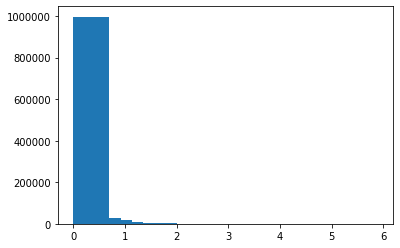

In [69]:
d=ds['Band1'] # makes a dataArray
# print(type(d))
# print(d.shape)
print(d.values[0])
print(len(flist))
for i in range(len(flist)):
    pass
hist, bins = np.histogram(d.values[15], bins=25)

print('hist', hist, 'bins',bins)
print(len(hist), len(bins[:-1]))


plt.bar(bins[:-1],hist, width=.7, align='edge')
plt.show()

In [33]:
# hist
print(type(hist))

<class 'tuple'>
